# IMPORT LIBRARY


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#  Membaca dan meresize gambar

In [2]:
img = cv2.imread('rasyid_abdul_hannafi.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, w, c = img.shape

if w > 1000:
    new_w = 1000
    ar = w / h
    new_h = int(new_w / ar)
    img = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_AREA)


# Pre-processing

In [3]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
ret, thresh = cv2.threshold(img_gray, 80, 255, cv2.THRESH_BINARY_INV)


# Segmentasi karakter

In [4]:
kernel = np.ones((3, 15), np.uint8)
dilated = cv2.dilate(thresh, kernel, iterations=1)

characters_list = []

(cnt, _) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
sorted_contour_chars = sorted(cnt, key=lambda cntr: cv2.boundingRect(cntr)[0])

for character in sorted_contour_chars:
    x, y, w, h = cv2.boundingRect(character)
    characters_list.append([x, y, x + w, y + h])
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 145, 100), 7)


# Menampilkan gambar asli dan gambar setelah diubah

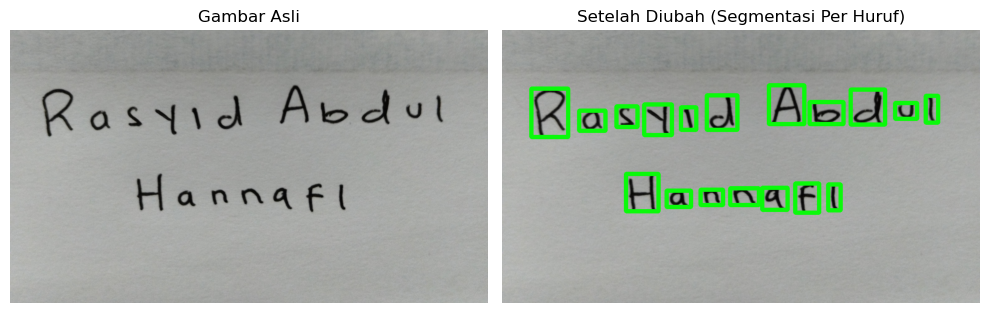

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Gambar asli sebelum diedit
axes[0].imshow(cv2.cvtColor(cv2.imread('rasyid_abdul_hannafi.jpg'), cv2.COLOR_BGR2RGB))
axes[0].set_title('Gambar Asli')
axes[0].axis('off')

# Gambar setelah diubah dengan segmentasi huruf per huruf
segmented_img = img.copy()
for character in characters_list:
    x1, y1, x2, y2 = character
    cv2.rectangle(segmented_img, (x1, y1), (x2, y2), (10, 250, 10), 7)

axes[1].imshow(segmented_img)
axes[1].set_title('Setelah Diubah (Segmentasi Per Huruf)')
axes[1].axis('off')

plt.tight_layout()
plt.show()